# Machine Learning Foundation Nanodegree Program
#Analyzing RMS Titanic ship data from [kaggle.com](https://www.kaggle.com/c/titanic/data)

Here in this project we are analyzing RMS Titanic subset of data to determine certain features such as whether someone survived or did not survive 

Some datail about that ship,In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew

We are using pandas,Numpy,matplotlib,csv,jupyter notebook for this data analyze project

In [180]:
 # import required pakages for analyzing the dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from scipy import stats as st
%matplotlib inline
# Loading the dataset using pandas

file_name = "titanic.csv"
titanic_data_frame = pd.read_csv(file_name)

display(titanic_data_frame.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA DICTONARY
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [181]:
titanic_data_frame.shape

(891, 12)

**Predictions**
We find that the total number of passengers in titanic is 891.

Now we are going to predict the survival factors of titanic passengers by assuming that we don't know weather the passengers are survied or not and then calculate our prediction accuracy with the help of the following function based on our predictions.

- First we will predict all passengers are died
- Then we will predict one by one all the predictions

This function will provide the mean accuracy by comparing the survival status of original data with our predicted data

In [182]:
# creating a dataframe with only survied 
survied = titanic_data_frame['Survived']

def prediction_rate(survied,prediction):
    return "{:.2f}%".format((survied == prediction).mean()*100)

# calling the prediction rete function with the first ten passengers are survied

prediction = []

prediction_accuracy = prediction_rate(survied[:10], pd.Series(np.ones(10, dtype = int)))

print("prediction_accuracy",prediction_accuracy)


prediction_accuracy 50.00%


**Prediction 1**

    Assume that all the passengers in titanis are died

In [183]:
# predicting all are died
prediction = pd.Series(np.zeros(len(titanic_data_frame), dtype = int))

prediction_accuracy = prediction_rate(survied, prediction)
print("prediction_accuracy",prediction_accuracy)


prediction_accuracy 61.62%


In [184]:
# take first first details and group by survived based on sex

titanic_data_frame.head().groupby("Survived")["Sex"].describe()

,count,unique,top,freq
Survived,,,,
0,2,1,male,2
1,3,1,female,3


Now from result we say that the survived states based on **sex**
- **Males** (0/2)
- **Female** (3/3)
-We also visuvalize the data using Matplotlib based on gender

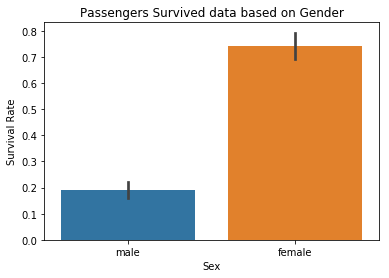

In [185]:
# bargraph ploting
def bar_graph(x_data, y_data, x_label, y_label, data, title):
    sns.barplot(x = x_data, y = y_data, data = data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

bar_graph('Sex', 'Survived', 'Sex', 'Survival Rate', titanic_data_frame, 'Passengers Survived data based on Gender')

**Prediction 2**

All the women passengers in the ship are survied 

In [ ]:
# predicting that all women passengers are survived
prediction = []
for _, row in titanic_data_frame.iterrows():
        prediction.append(1 if row['Sex'] == "female" else 0)
prediction = pd.Series(prediction)

# Calculating our prediction accuracy
prediction_accuracy = prediction_rate(survied, prediction)
print("prediction_accuracy",prediction_accuracy)

  

prediction_accuracy 78.68%


Thus our prediction score becomes 78.68% from 50.00% by just considering the sex column in the data frame this indicates that we are predicting the survival fatures correctly 

**prediction 3**

Now we consider that all the womens and all passengers in Pclass one are survived



In [ ]:
# drawing bar graph for prediction 3 
bar_graph('Pclass', 'Survived', 'Pclass', 'Survival Rate', titanic_data_frame, 'Passengers Survived data based on Pclass')

In [ ]:
# predicting that all women passengers and Pclass = 1 are survived
prediction = []
for _, row in titanic_data_frame.iterrows():
        prediction.append(1 if row['Sex'] == "female" or row['Pclass'] == 1 else 0)
prediction = pd.Series(prediction)

# Calculating our prediction accuracy
prediction_accuracy = prediction_rate(survied, prediction)
print("prediction_accuracy",prediction_accuracy)


**Wrong prediction**

Here the prediction accuracy is reduced to 75.08%.This clearly shows that our predictions has some error.

We will investicate the Pclass == 1/first class passengers data so we can able to understand why our prediction goes wrong

In [ ]:
pclass_1 = titanic_data_frame[titanic_data_frame["Pclass"] == 1]

pclass_1.groupby("Sex")["Survived"].describe()

Thus from the above data we can see that the survival mean of mens is 0.36 that means most of the male passengers in first class are did not survived.This is why our predictions goes wrong 

Then we can predict that the men in the **Pclass "1" is not survived**

**Mens survivel based on age**

   Since most of the mans are Deceased so we will investige the mens 
survival based on their ages.we will plot histogram for mens dased on their ages 

In [ ]:
max_age_of_men = int(titanic_data_frame["Age"].max())

# bin values
bins = [i for i in range(0,max_age_of_men+1,10)]

# survived details and deceased details
survived_mens_ages = titanic_data_frame[titanic_data_frame["Survived"] == 1]
deceased_mens_ages = titanic_data_frame[titanic_data_frame["Survived"] == 0]

# since the age is not specified in certain rows they are removed
deceased_mens_ages = deceased_mens_ages["Age"].dropna()
survived_mens_ages = survived_mens_ages["Age"].dropna()

# histograms ploting method
def plot_hist(data,bin_value,color,label):
    plt.hist(data,bin_value,histtype = 'bar',color =color,label = label,rwidth=0.98)
    plt.xlabel("Mens age")
    plt.ylabel("Survivel rate")
    plt.title("Mens survival and deceased rate baed on age")
    plt.legend()


plot_hist(deceased_mens_ages,bins,"m","Deceased")
plot_hist(survived_mens_ages,bins,"b","Survived")




With this visuvalisation the mens younger then the age "10" are survived then others.so we can predict that the men who's age is less 15 are survived

**prediction 4**

Assume that all the womens and mens who's age < 10 are survived and all the other passengers are died

In [ ]:
# prediction 4

prediction = []
for _, row in titanic_data_frame.iterrows():
        prediction.append(1 if row['Sex'] == "female" or (row['Sex'] == "male" and row["Age"] < 10) else 0)
prediction = pd.Series(prediction)

# Calculating our prediction accuracy
prediction_accuracy = prediction_rate(survied, prediction)
print("prediction_accuracy",prediction_accuracy)

Thus after these prediction based on the **Sex** and **Age < 10**
and the prediction score becomes approximately 80% if we continue to do our prediction process we will definitely find all the Factor/reason for the survival of the passengers in titanic


In [ ]:
#predict all the one in the pclass 3 afe died
pclass_3 = titanic_data_frame[titanic_data_frame["Pclass"] == 3]

pclass_3.groupby("Sex")["Survived"].describe()

Adding the addition prediction that all the passengers in Pclass 3 are died the prediction rate increased a little 

In [ ]:
# further predictions
prediction = []
final_dataset = []
for _, row in titanic_data_frame.iterrows():
    if ((row['Sex'] == "female" and row["Pclass"] != 3) or (row['Sex'] == "male" and row["Age"] < 15 and (row["Pclass"] != 3))):
        prediction.append(1)
        final_dataset.append(row)
    else:
        prediction.append(0)
        
prediction = pd.Series(prediction)

# Calculating our prediction accuracy
prediction_accuracy = prediction_rate(survied, prediction)
print("prediction_accuracy",prediction_accuracy)

In [ ]:
final_dataset = pd.Series(final_dataset)
print(final_dataset.describe())
print(st.ttest_ind(prediction,survied))

**Columns used to analysis the dataset**: sex,age,Pclass

If we also take the remaninig columns and analysis the dataset with them prediction score will get higher

**Conclusion**

- From the above analysis we can able to say that most of the female passengers are survied
- Male passengers in which ho are not in pclass(3) and also age is less then 15 are survived
- We can make futher predictions on this dataset for analysing feacuter that make passengers more likely to survive